# Определение популярности песни по некоторым ее характеристикам

Данные "data.csv" &mdash; - это таблица из более, чем 170.000 песен, собранных с помощью Spotify WEB API.

Расшифровка столбцов в "data.csv" для справки:
- acousticness &mdash; акустичность трека (по некоторой условной шкале от 0 до 1)
- artists &mdash; исполнитель
- danceability &mdash; танцевальность трека (по некоторой условной шкале от 0 до 1)
- duration_ms &mdash; длительность в миллисекундах
- energy &mdash; энергия трека (по некоторой условной шкале от 0 до 1) 
- explicit &mdash; содержание в треке нецензурной лексики (0 - нет нецензурной лексики, 1 - есть нецензурная лексика) 
- id &mdash; индивидуальный номер трека, сгенирированный Spotify
- instrumentalness &mdash; инструментальность трека (по некоторой условной шкале от 0 до 1)
- key &mdash; первая нота трека (С - 0, С# - 1 и так далее, H - 11)
- liveness &mdash; звучность живого исполнения трека (по некоторой условной шкале от 0 до 1)
- loudness &mdash; громкость трека в децибелах (в диапазоне от -60 о 0)
- mode &mdash; начинается ли трек с основной аккордовой последовательности (0 - не начинается, 1 - начинается)
- name &mdash; название трека
- popularity &mdash; популярность трека в США (по некоторой условной шкале от 0 до 100)
- release_date &mdash; дата выпуска трека (в формате yyyy-mm-dd или yyyy)
- speechiness	&mdash; содержание человеческого голоса (по некоторой условной шкале от 0 до 1)
- tempo &mdash; темп трека в BMP (от 0 до 250)
- valence &mdash; позитивность трека (по некоторой условной шкале от 0 до 1)
- year &mdash; год выпуска трека (от 1920 до 2021)

### 1. Загрузка данных

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [74]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data[0:15]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


### 2. Удаление ненужных данных

Заметим, что столбец *id* нам не нужен, так как это просто рандомно сгенерированное уникальное имя трека. Удалим также столбец *artists*, так как это не числовые функции от трека. Удалим также столбец *release_date*, так как не у всех треков есть точная дата, но у всех есть определнный год выпуска, который указан в другом столбце.
 Столбец *name* заменим на *length of name*, так как длинные названия хуже запоминаются и "вредят" популярности

In [75]:
data = data.drop(data.columns[[1, 6, 14]], axis=1)
data = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 12, 13, 14, 11]]
data.rename(columns={'name':'length of name'}, inplace=True)
data.iloc[:, 10] = [len(x) for x in data.iloc[:, 10]]
data[0:10]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,length of name,year,speechiness,tempo,valence,popularity
0,0.991000,0.598,168333,0.2240,0,0.000522,5,0.3790,-12.628,0,24,1920,0.0936,149.976,0.6340,12
1,0.643000,0.852,150200,0.5170,0,0.026400,5,0.0809,-7.261,0,20,1920,0.0534,86.889,0.9500,7
2,0.993000,0.647,163827,0.1860,0,0.000018,0,0.5190,-12.098,1,12,1920,0.1740,97.600,0.6890,4
3,0.000173,0.730,422087,0.7980,0,0.801000,2,0.1280,-7.311,1,53,1920,0.0425,127.997,0.0422,17
4,0.295000,0.704,165224,0.7070,1,0.000246,10,0.4020,-6.036,0,9,1920,0.0768,122.076,0.2990,2
5,0.996000,0.424,198627,0.2450,0,0.799000,5,0.2350,-11.470,1,27,1920,0.0397,103.870,0.4770,9
6,0.992000,0.782,195200,0.0573,0,0.000002,5,0.1760,-12.453,1,28,1920,0.0592,85.652,0.4870,5
7,0.996000,0.474,186173,0.2390,0,0.186000,9,0.1950,-9.712,1,14,1920,0.0289,78.784,0.3660,0
8,0.996000,0.469,146840,0.2380,0,0.960000,8,0.1490,-18.717,1,28,1920,0.0741,130.060,0.6210,0
9,0.006820,0.571,476304,0.7530,0,0.873000,8,0.0920,-6.943,1,28,1920,0.0446,126.993,0.1190,0


### 3. Пропуски в данных

Проверим, есть ли пропуски в данных. Если есть, то заменим на среднее значение по столбцу

In [76]:
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
length of name      0
year                0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

### 4. Визуализация данных

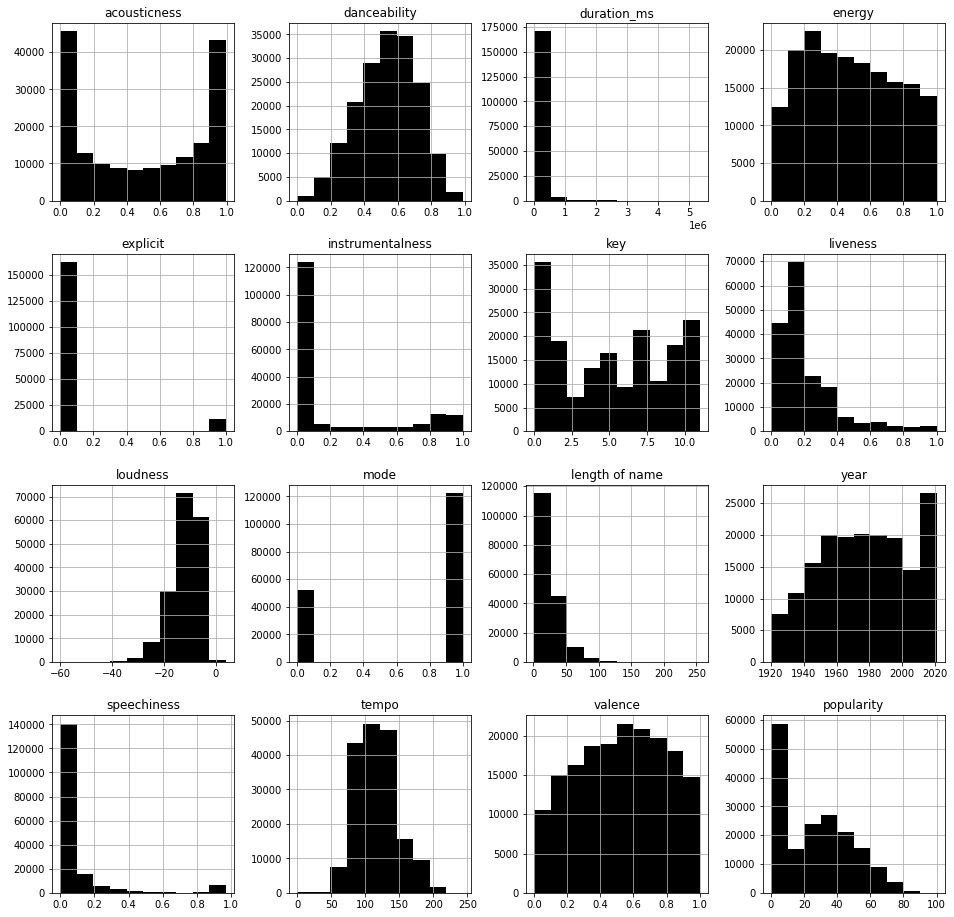

In [77]:
import matplotlib.pyplot as plt

data.hist(figsize=(16, 16), color='black')
plt.show()

### 5. Нормализация данных

In [78]:
data.iloc[:, 8] += 65.0

for i in range(0, len(data.columns) - 1):
  mx = np.nanmax(data.iloc[:, i].values)
  data.iloc[:, i] /= mx

data[0:10]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,length of name,year,speechiness,tempo,valence,popularity
0,0.994980,0.605263,0.031533,0.2240,0.0,0.000522,0.454545,0.3790,0.760613,0.0,0.094118,0.950025,0.096395,0.615900,0.6340,12
1,0.645582,0.862348,0.028136,0.5170,0.0,0.026400,0.454545,0.0809,0.838559,0.0,0.078431,0.950025,0.054995,0.356823,0.9500,7
2,0.996988,0.654858,0.030689,0.1860,0.0,0.000018,0.000000,0.5190,0.768310,1.0,0.047059,0.950025,0.179197,0.400810,0.6890,4
3,0.000174,0.738866,0.079068,0.7980,0.0,0.801000,0.181818,0.1280,0.837833,1.0,0.207843,0.950025,0.043769,0.525640,0.0422,17
4,0.296185,0.712551,0.030951,0.7070,1.0,0.000246,0.909091,0.4020,0.856350,0.0,0.035294,0.950025,0.079094,0.501324,0.2990,2
5,1.000000,0.429150,0.037208,0.2450,0.0,0.799000,0.454545,0.2350,0.777431,1.0,0.105882,0.950025,0.040886,0.426559,0.4770,9
6,0.995984,0.791498,0.036566,0.0573,0.0,0.000002,0.454545,0.1760,0.763154,1.0,0.109804,0.950025,0.060968,0.351743,0.4870,5
7,1.000000,0.479757,0.034875,0.2390,0.0,0.186000,0.818182,0.1950,0.802963,1.0,0.054902,0.950025,0.029763,0.323539,0.3660,0
8,1.000000,0.474696,0.027507,0.2380,0.0,0.960000,0.727273,0.1490,0.672181,1.0,0.109804,0.950025,0.076313,0.534112,0.6210,0
9,0.006847,0.577935,0.089224,0.7530,0.0,0.873000,0.727273,0.0920,0.843178,1.0,0.109804,0.950025,0.045932,0.521517,0.1190,0


### 6. Разделим data и data_score

In [79]:
data_score = data.iloc[:, -1]
data = data.drop(data.columns[-1], axis=1)

### 7. Линейная регрессия

#### 7.1 Выделим training_data и target_values

In [80]:
X = data.to_numpy()
y = data_score.to_numpy()
y = np.hstack(y)

print(y)

[12  7  4 ...  0 69  0]


#### 7.2 Посчитаем RMSE до борьбы с выбросами

In [81]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)
print("RMSE =", RMSE)
print("cross_val_score=", cross_val_score(model, X, y))

RMSE = 17.350405962761354
cross_val_score= [0.25693723 0.47028577 0.38242499 0.28931536 0.09907891]


#### 7.3 Посмотрим на ошибку для каждого трека

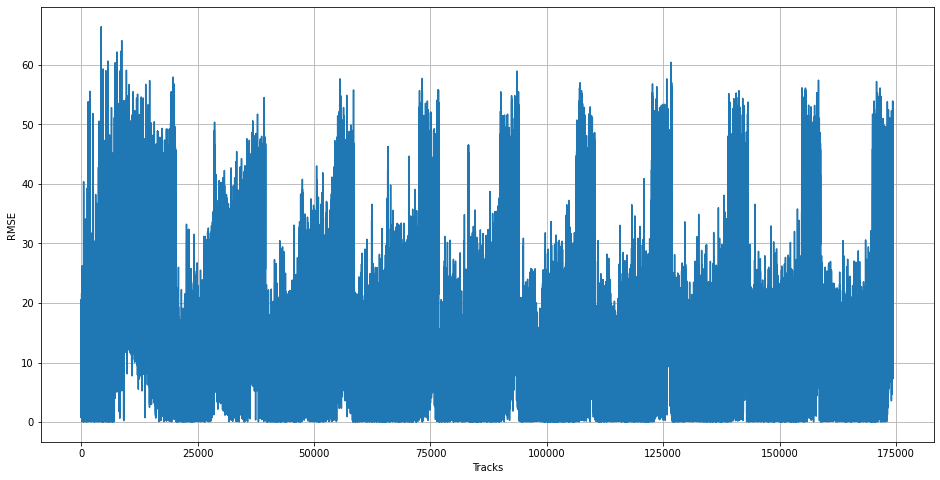

In [82]:
import matplotlib.pyplot as plt

%matplotlib inline

tracks = np.arange(len(data))
rmse = []

model = linear_model.LinearRegression()
model.fit(X, y)

for i in range(len(data)):
    
    X_i = data[i:i+1].to_numpy()
    y_i = [y[i]]
    RMSE = mean_squared_error(y_i, model.predict(X_i), squared=False)
    rmse.append(RMSE)

#
plt.figure(figsize = (16, 8))
plt.plot(tracks, rmse, label = u"")
plt.xlabel(u"Tracks")
plt.ylabel(u"RMSE")
plt.grid()


#### 7.4 Удалим песни с большим отклонением (удалим примерно 3%)

In [83]:
percentile = 97

crazy_threshold = np.percentile(rmse, q = percentile)

to_delete = []

model = linear_model.LinearRegression()
model.fit(X, y)

for i in range(len(data)):
    X_i = data[i:i+1].to_numpy()
    y_i = [y[i]]
    RMSE = mean_squared_error(y_i, model.predict(X_i), squared=False)
    if RMSE > crazy_threshold:
        to_delete.append(data.index[i])
        

new_data = data
new_data = new_data.drop(to_delete)
y = np.delete(y, to_delete, axis = 0)
X = new_data.to_numpy()

#### 7.5 Финальное предсказание линейной регрессии

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)

print("RMSE = ", RMSE)
print("cross_val_score =", cross_val_score(model, X, y))

RMSE =  15.640354282545404
cross_val_score = [0.35497233 0.53524923 0.49600641 0.4387669  0.28976229]


### 8. Ramdom Forest Regresion

#### 8.1. Выделим training_data и target_values

In [85]:
X = data.to_numpy()
y = data_score.to_numpy()
y = np.hstack(y)

print(y)

[12  7  4 ...  0 69  0]


#### 8.2 Регрессия

In [103]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = RandomForestRegressor(max_features = 'sqrt', bootstrap = False, n_jobs = -1)
model.fit(X_train, y_train)

RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)

print("RMSE = ", RMSE)

RMSE =  12.196360414054435


####8.3 Построим график числа деревьев

In [105]:
stepCount = 300
cur = []

for i in range(100, stepCount + 1, 10):
  model = RandomForestRegressor(n_estimators=i, max_features = 'sqrt', bootstrap = False, n_jobs = -1)
  model.fit(X_train, y_train)
  RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)
  print(i, " : ", RMSE)
  cur.append((i, RMSE))

100  :  12.191866896166138
110  :  12.181003555690653
120  :  12.196605666741274
130  :  12.17214629747935
140  :  12.168145205241688
150  :  12.174252046555665
160  :  12.16123067216404
170  :  12.144178143837273
180  :  12.170173792544436
190  :  12.139526105623224
200  :  12.164666599875765
210  :  12.166253183292403
220  :  12.141087699967791
230  :  12.15092975729601
240  :  12.146736023408783
250  :  12.159720831305654
260  :  12.148109077753872
270  :  12.146026592589743
280  :  12.144468489352068
290  :  12.154853993659673
300  :  12.138672376263422


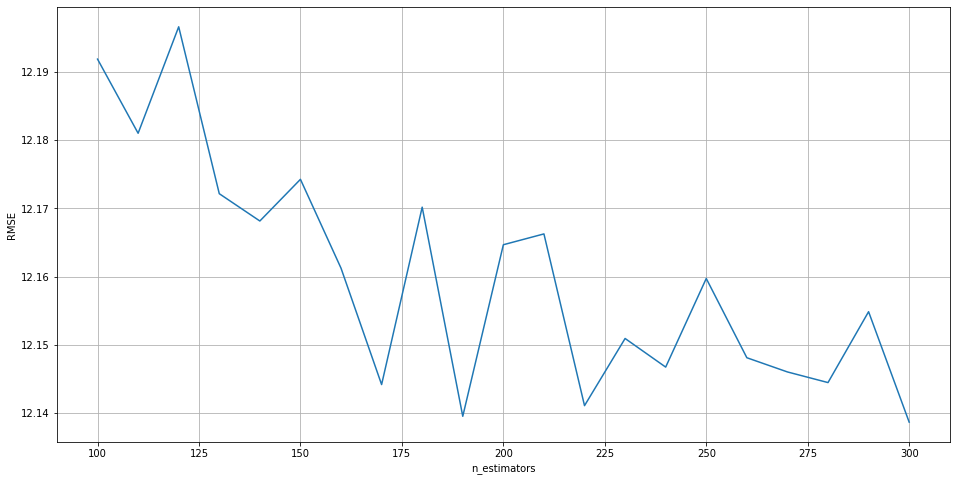

In [113]:
cur0 = []
cur1 = []
for x, y in cur:
  cur0.append(y)
  cur1.append(x)
plt.figure(figsize=[16,8])
plt.plot(cur1, cur0)
plt.xlabel(u"n_estimators")
plt.ylabel(u"RMSE")
plt.grid()
plt.show()

Значение, при котором наименьшее RMSE, достигается при n_estimators = 300

####8.4 Построим график глубины дерева

In [115]:
stepCount = 30
cur = []

for i in range(1, stepCount + 1, 1):
  model = RandomForestRegressor(max_depth=i, max_features = 'sqrt', bootstrap = False, n_jobs = -1)
  model.fit(X_train, y_train)
  RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)
  print(i, " : ", RMSE)
  cur.append((i, RMSE))

1  :  19.01814106886445
2  :  17.758814651490418
3  :  16.639234712661725
4  :  16.001339447796045
5  :  15.415667286286777
6  :  14.949002009813864
7  :  14.624998956623754
8  :  14.239818396501821
9  :  13.839547841307324
10  :  13.578903354293285
11  :  13.345802936241745
12  :  13.126293942224281
13  :  12.971600627003822
14  :  12.78798007618724
15  :  12.627629208167843
16  :  12.508826718203757
17  :  12.43752821261951
18  :  12.330954101271335
19  :  12.279581829853251
20  :  12.23014053933555
21  :  12.183038595697194
22  :  12.194282117748758
23  :  12.133065916660497
24  :  12.172848555985368
25  :  12.153864279862697
26  :  12.17262457955955
27  :  12.160517303555304
28  :  12.185542395091474
29  :  12.176420095190451
30  :  12.172312398513101


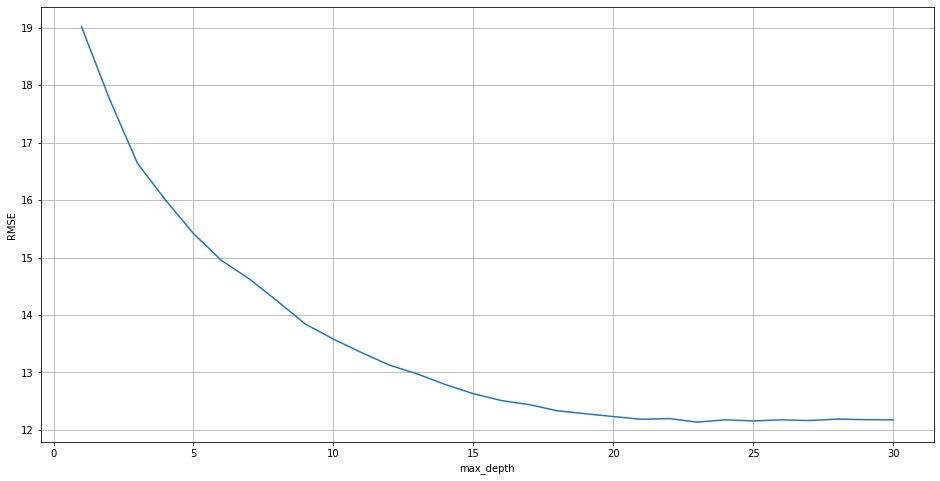

In [117]:
cur0 = []
cur1 = []
for x, y in cur:
  cur0.append(y)
  cur1.append(x)
plt.figure(figsize=[16,8])
plt.plot(cur1, cur0)
plt.xlabel(u"max_depth")
plt.ylabel(u"RMSE")
plt.grid()
plt.show()

Значение, при котором наименьшее RMSE, достигается при max_depth = 23

#### 8.5 Посчитаем итоговую ошибку

In [125]:
y = data_score.to_numpy()
y = np.hstack(y)

print(y)

[12  7  4 ...  0 69  0]


In [127]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = RandomForestRegressor(n_estimators = 300, max_depth = 23, max_features = 'sqrt', bootstrap = False, n_jobs = -1)
model.fit(X_train, y_train)

RMSE = mean_squared_error(y_test, model.predict(X_test), squared=False)

print("RMSE = ", RMSE)

RMSE =  12.118864410535997
